# Testar lite analys

In [1]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt

with open("results (15).csv") as f:
  csv_string = f.read()

# Split the two tables
table1_str = csv_string[:csv_string.find("imageA")]
table2_str = csv_string[csv_string.find("imageA"):]

table1 = pd.read_table(StringIO(table1_str), sep=",")
table2 = pd.read_table(StringIO(table2_str), sep=",")

# Strip folder number in file names
table1 = table1.rename(lambda s: s.split("\\")[-1], axis="columns")
for col_name in ['imageA', 'imageB', 'chosenImage']:
    table2[col_name] = table2[col_name].map(lambda s: s.split("\\")[-1])
    
image_sets = list(set(name.split("_")[0] for name in table1.columns[6:]))
image_sets

['snail', 'smolking', 'mushroom', 'interpsmolking', 'bus', 'stonewall']

In [2]:
# run to interact with figures
#%matplotlib notebook

In [3]:
table1.iloc[:, 2:]

,time,age,gender,imageExperience,bus_bicubic.png,bus_bilinear.png,bus_lanczos3.png,bus_ogniewski.png,interpsmolking_bicubic.png,interpsmolking_bilinear.png,...,smolking_lab.png,smolking_linrgb.png,smolking_srgb.png,snail_lab.png,snail_linrgb.png,snail_srgb.png,stonewall_bicubic.png,stonewall_bilinear.png,stonewall_lanczos3.png,stonewall_ogniewski.png
0,1432.307,1,male,professional,3,1,0,2,3,1,...,1,0,2,0,1,2,1,3,2,0
1,330.802,47,male,professional,1,3,0,2,1,2,...,1,0,2,2,1,0,2,0,1,3
2,168.833,23,male,education,2,1,0,3,1,2,...,0,2,1,0,2,1,2,0,1,3
3,19.183,1,other,none,3,2,0,1,0,2,...,3,0,2,3,0,1,0,3,2,1
4,478.702,56,male,professional,2,1,0,3,3,1,...,1,0,2,0,1,2,3,0,1,2


In [4]:
table2

,imageA,imageB,chosenImage,time,participantId,isRepeat
0,bus_bicubic.png,bus_bilinear.png,bus_bicubic.png,53.354,312a7c52-7a84-44a4-9472-fc147fb0d211,0
1,bus_bicubic.png,bus_ogniewski.png,bus_bicubic.png,25.603,312a7c52-7a84-44a4-9472-fc147fb0d211,0
2,bus_ogniewski.png,bus_bilinear.png,bus_ogniewski.png,3.338,312a7c52-7a84-44a4-9472-fc147fb0d211,0
3,bus_bilinear.png,bus_ogniewski.png,bus_bilinear.png,8.419,312a7c52-7a84-44a4-9472-fc147fb0d211,1
4,bus_ogniewski.png,bus_lanczos3.png,bus_ogniewski.png,3.138,312a7c52-7a84-44a4-9472-fc147fb0d211,0
...,...,...,...,...,...,...
142,stonewall_bicubic.png,stonewall_bilinear.png,stonewall_bicubic.png,7.109,bd3a8d7f-7bfc-441f-b0d7-709b0e33c368,0
143,stonewall_bilinear.png,stonewall_bicubic.png,stonewall_bilinear.png,6.421,bd3a8d7f-7bfc-441f-b0d7-709b0e33c368,1
144,stonewall_bilinear.png,stonewall_ogniewski.png,stonewall_ogniewski.png,26.716,bd3a8d7f-7bfc-441f-b0d7-709b0e33c368,0
145,stonewall_lanczos3.png,stonewall_ogniewski.png,stonewall_ogniewski.png,8.476,bd3a8d7f-7bfc-441f-b0d7-709b0e33c368,0


## Filter data [TODO]

In [5]:
table1 = table1.query("age != 1")

#table1 = table1.query("age > 25")

# TODO Filter in table2 as well
#table1

<AxesSubplot:>

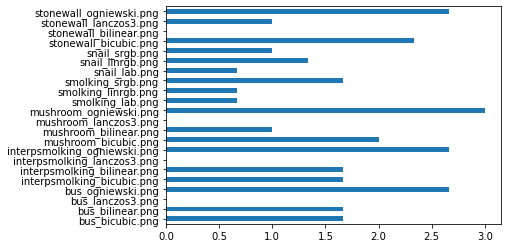

In [6]:
table1.iloc[:, 6:].mean().plot.barh()

## Rankings for each image set

<Figure size 432x288 with 0 Axes>

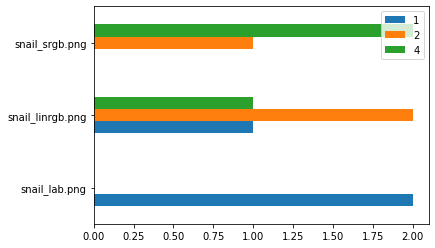

<Figure size 432x288 with 0 Axes>

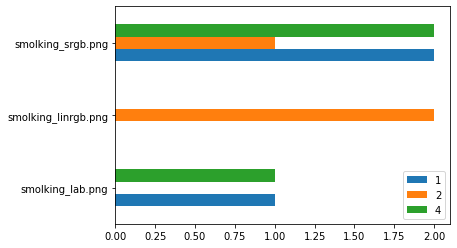

<Figure size 432x288 with 0 Axes>

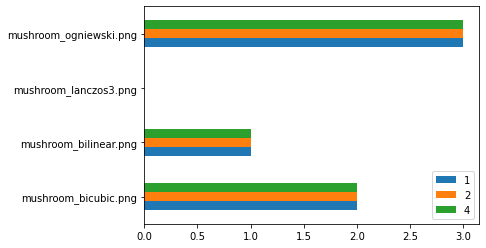

<Figure size 432x288 with 0 Axes>

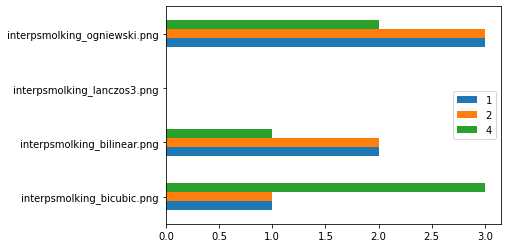

<Figure size 432x288 with 0 Axes>

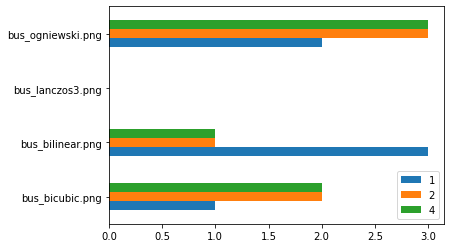

<Figure size 432x288 with 0 Axes>

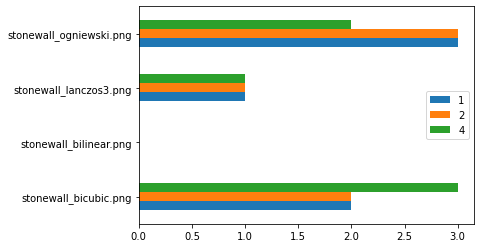

In [7]:
for selected_set in image_sets:
    plt.figure()
    matching_cols = [col for col in table1 if col.startswith(selected_set)]
    #table1[matching_cols].mean().plot.barh()
    #table1[matching_cols].plot.box() # Probably useful when we have some participants
    
    table1[matching_cols].transpose().plot.barh()
    
    
    

## Idk

<AxesSubplot:>

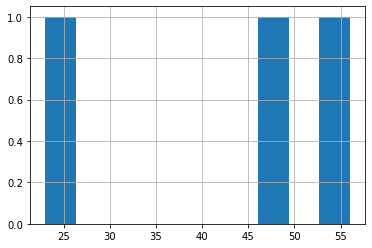

In [8]:
table1['age'].hist()

<AxesSubplot:>

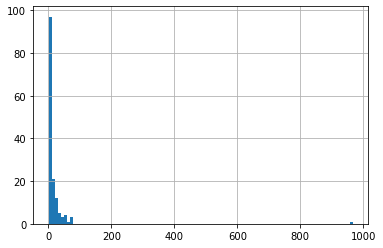

In [9]:
table2['time'].hist(bins=100)